In [3]:
# Installing required packages
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=fc78943be062b719f0998e2f12477a51b33fe5078f5b442bfd1e1fbb2eead8da
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import findspark
findspark.init()

In [5]:
import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [6]:
# Creating a spark context class
sc = SparkContext()

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [70]:
spark

In [71]:
import pandas as pd

In [72]:
data = pd.read_csv("/content/egphotelbookings.csv")
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Renaissance Hotel,0,342,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,1,Renaissance Hotel,0,737,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,2,Renaissance Hotel,0,7,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,3,Renaissance Hotel,0,13,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,4,Renaissance Hotel,0,14,2018,July,27,1,0,2,2,0.0,0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


# **1- Perform any necessary data cleaning & engineering that renders your data useable (i.e. handling missing values, duplicates, classification, transformation...etc.)**

**We need to drop ("Unnamed") column as it's an extra index for the values while there's an already existing column that was created by default** 

In [73]:
data.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Renaissance Hotel,0,342,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Renaissance Hotel,0,737,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Renaissance Hotel,0,7,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Renaissance Hotel,0,13,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Renaissance Hotel,0,14,2018,July,27,1,0,2,2,0.0,0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


**Changing the values of the attribute 'is_canceled' from 0/1 to be = yes/no ( logic wise)**

In [74]:
data['is_canceled'] = data ['is_canceled'].replace(1 , 'Yes')
data['is_canceled'] = data ['is_canceled'].replace(0 , 'No')
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Renaissance Hotel,No,342,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Renaissance Hotel,No,737,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Renaissance Hotel,No,7,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Renaissance Hotel,No,13,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Renaissance Hotel,No,14,2018,July,27,1,0,2,2,0.0,0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
5,Renaissance Hotel,No,14,2018,July,27,1,0,2,2,0.0,0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
6,Renaissance Hotel,No,0,2018,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0
7,Renaissance Hotel,No,9,2018,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1
8,Renaissance Hotel,Yes,85,2018,July,27,1,0,3,2,0.0,0,BB,PRT,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1
9,Renaissance Hotel,Yes,75,2018,July,27,1,0,3,2,0.0,0,HB,PRT,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0


**changing TA/TO --> Travel Agents/ Tour Operators**

In [75]:
data['distribution_channel'] = data ['distribution_channel'].replace('TA/TO', 'Travel Agents / Tour Operators')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Renaissance Hotel,No,342,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Renaissance Hotel,No,737,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Renaissance Hotel,No,7,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Renaissance Hotel,No,13,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Renaissance Hotel,No,14,2018,July,27,1,0,2,2,0.0,0,BB,GBR,Travel Agents / Tour Operators,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


**Changing the values of the attribute 'is_repeated_guest' from 0/1 to be = yes/no ( logic wise)**

In [76]:
data['is_repeated_guest'] = data ['is_repeated_guest'].replace(1 , 'Yes')
data['is_repeated_guest'] = data ['is_repeated_guest'].replace(0 , 'No')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Renaissance Hotel,No,342,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,No,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Renaissance Hotel,No,737,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,No,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Renaissance Hotel,No,7,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,No,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Renaissance Hotel,No,13,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,No,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Renaissance Hotel,No,14,2018,July,27,1,0,2,2,0.0,0,BB,GBR,Travel Agents / Tour Operators,No,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


**renaming 3ady** 

In [77]:
data.rename(columns={'adr': "Average_Daily_Rate"}, inplace=True)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_Daily_Rate,required_car_parking_spaces,total_of_special_requests
0,Renaissance Hotel,No,342,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,No,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Renaissance Hotel,No,737,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,No,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Renaissance Hotel,No,7,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,No,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Renaissance Hotel,No,13,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,No,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Renaissance Hotel,No,14,2018,July,27,1,0,2,2,0.0,0,BB,GBR,Travel Agents / Tour Operators,No,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


**Handling missing values**

In [78]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

**the above result shows columns (agent, company, country) contain null values, so we need to drop NAN info** 

In [79]:
columns_with_na = ['agent' , 'company', 'country']
cleaned_data = data.dropna(axis=0, how = 'any', subset = columns_with_na, inplace = False)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2392 to 116451
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           217 non-null    object 
 1   is_canceled                     217 non-null    object 
 2   lead_time                       217 non-null    int64  
 3   arrival_date_year               217 non-null    int64  
 4   arrival_date_month              217 non-null    object 
 5   arrival_date_week_number        217 non-null    int64  
 6   arrival_date_day_of_month       217 non-null    int64  
 7   stays_in_weekend_nights         217 non-null    int64  
 8   stays_in_week_nights            217 non-null    int64  
 9   adults                          217 non-null    int64  
 10  children                        217 non-null    float64
 11  babies                          217 non-null    int64  
 12  meal                          

In [80]:
cleaned_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_Daily_Rate,required_car_parking_spaces,total_of_special_requests
2392,Renaissance Hotel,No,6,2018,October,42,11,2,0,2,0.0,0,BB,PRT,Travel Agents / Tour Operators,No,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1
2697,Renaissance Hotel,No,24,2018,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,No,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0
2867,Renaissance Hotel,No,24,2018,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,No,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0
2877,Renaissance Hotel,No,24,2018,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,No,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0
2878,Renaissance Hotel,No,24,2018,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,No,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0


**from now on, we'll use (cleaned_data) dataset as it represents the new cleaned data**

**Removing duplicates** 

In [81]:
cleaned_data.duplicated().sum()

29

In [82]:
cleaned_data = cleaned_data.drop_duplicates()

In [83]:
cleaned_data.duplicated().sum()

0

# **2- Derive 3 insights about attributes from the dataset using appropriate visualizations**

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

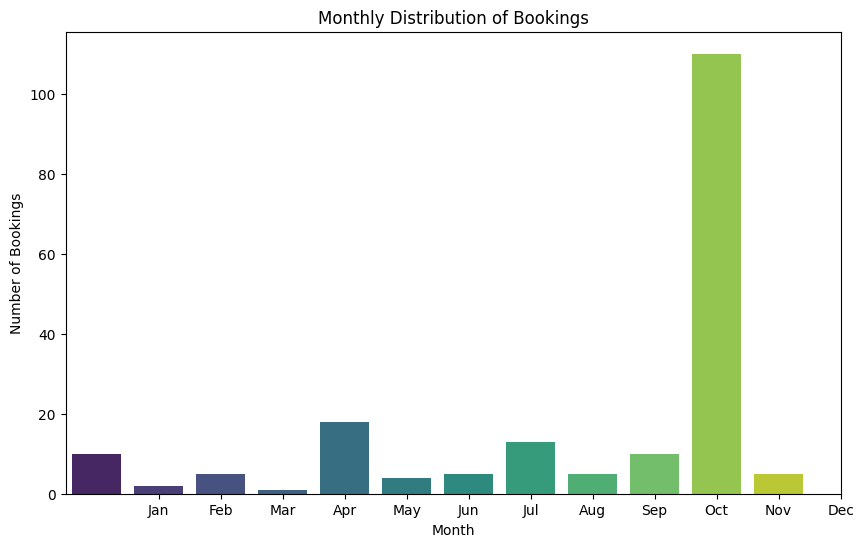

In [85]:
cleaned_data['arrival_date_month'] = pd.to_datetime(cleaned_data['arrival_date_month'], format='%B').dt.month

monthly_bookings = cleaned_data['arrival_date_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(monthly_bookings))
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette=colors)

plt.title('Monthly Distribution of Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

# INSIGHT 1 👆🏻: 
# - The visualization shows the monthly distribution of hotel bookings. By showing the booking patterns throughout the year, we can gain insights into the high and low bookings in different months.

# - We can see form here that the highest month of gain was october, and the least one was march.

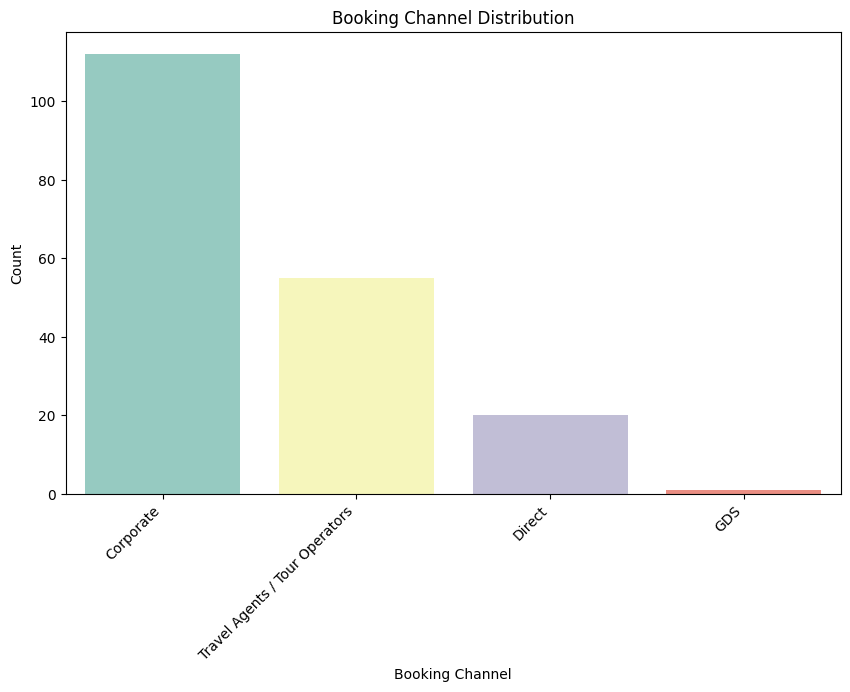

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

booking_channel_counts = cleaned_data['distribution_channel'].value_counts()

plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set3', len(booking_channel_counts))

sns.barplot(x=booking_channel_counts.index, y=booking_channel_counts, palette=colors)
plt.xlabel('Booking Channel')
plt.ylabel('Count')
plt.title('Booking Channel Distribution')

plt.xticks(rotation=45, ha='right')  

plt.show()


# INSIGHT 2: 👆🏻  
# - Visualizing the distribution of booking channels can provide findings into the most popular channels through which customers make their bookings.

- This visualization provides findings into the distribution of hotel bookings across different booking channels.


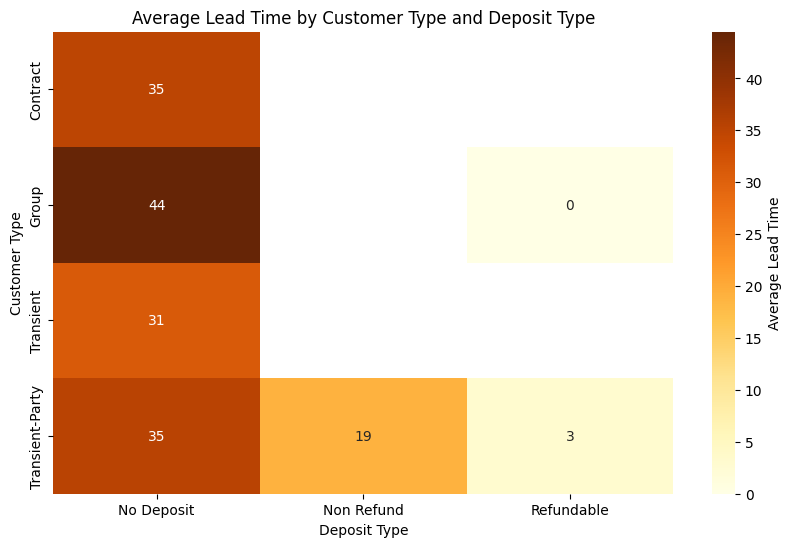

In [87]:
lead_time_avg = cleaned_data.groupby(['customer_type', 'deposit_type'])['lead_time'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(lead_time_avg, cmap='YlOrBr', annot=True, fmt=".0f", cbar_kws={'label': 'Average Lead Time'})

plt.title('Average Lead Time by Customer Type and Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Customer Type')

plt.show()


# INSIGHT 3: 👆🏻 
#  - Visualizing the average lead time based on the customer type and deposit type 

- This visualization provides insights into the average lead time, which is the average duration between booking and arrival, based on different customer types and deposit types.

- The resulting heatmap provides a visual representation of the average lead time for different combinations of customer types and deposit types. The color degree in each cell represents the average lead time, with darker colors indicating longer lead times. The labels on the heatmap show the actual average lead time values for each combination.

- By analyzing the heatmap, we can easily identify patterns or trends in lead time based on the customer type and deposit type, helping to gain insights into the data.



<Figure size 1000x600 with 0 Axes>

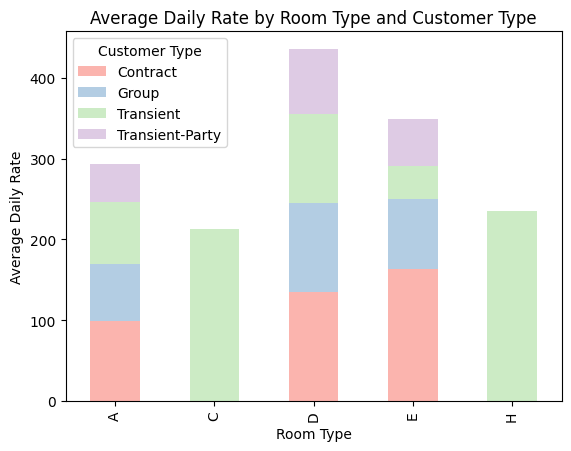

In [88]:
# Grouping by room type and customer type and calculating average daily rate
room_cust_avg_rate = cleaned_data.groupby(['reserved_room_type', 'customer_type'])['Average_Daily_Rate'].mean().unstack()

plt.figure(figsize=(10, 6))
colors = sns.color_palette('Pastel1', len(room_cust_avg_rate))
room_cust_avg_rate.plot(kind='bar', stacked=True, color=colors)

plt.title('Average Daily Rate by Room Type and Customer Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate')
plt.legend(title='Customer Type')

plt.show()




# INSIGHT 4 👆🏻:

# -A stacked bar plot to visualize the average daily rate for different combinations of room types and customer types in the dataset.

- The resulting plot visualizes the average daily rate for different combinations of room types and customer types. Each bar represents a room type, and the height of the bar represents the average daily rate. The bars are stacked to show the contribution of each customer type to the total average daily rate for each room type. 

- By analyzing the stacked bar plot, we can compare the average daily rates across room types and observe how different customer types contribute to the overall rates.

# **3- Come up with 3 promotions to offer per hotel (must be supported by results of queries of your own creation)**


**We decided to use Spark DataFrame** 

first, we'll create a spark dataframe that holds our cleaned_data

In [89]:
spark_data = spark.createDataFrame(cleaned_data)
spark_data.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requests|
+---------

**1ST PROMOTION 🎫**


***Stay and Spa Package*** 💆🏻

-----
**Promotion:** Book a minimum of 3 nights and enjoy a complimentary spa treatment during your stay 💆🏻‍♀️ .

**Conditions:** The promotion is available for bookings with a minimum length of stay of 3 nights.

**Benefit:** Guests can indulge in relaxation and rejuvenation with a complimentary spa treatment, enhancing their overall experience and promoting wellness 🧖🏻 .

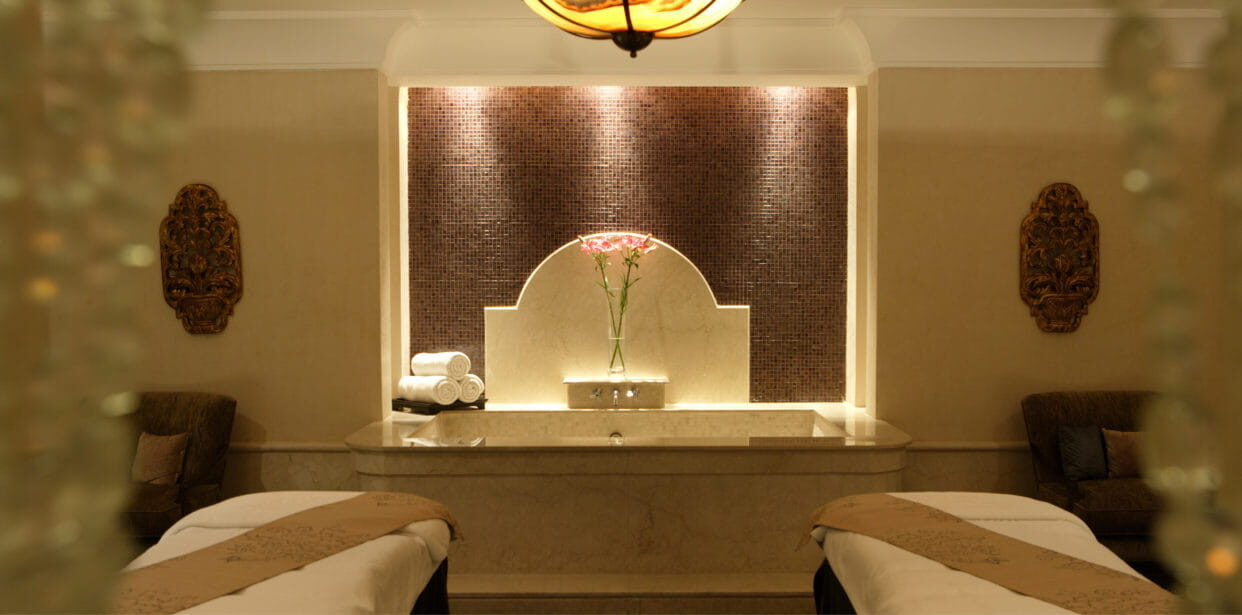

*Renaissance Hotel*

In [146]:
from pyspark.sql.functions import lit , when

filtered_data = spark_data.filter((spark_data.hotel == 'Renaissance Hotel') & (spark_data.stays_in_weekend_nights + spark_data.stays_in_week_nights >= 3 ))

# create the promotion column
promotion_h1 = filtered_data.withColumn("promotion", lit("Stay and Spa Package"))

promotion_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+--------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special

*JW Marriott Hotel*

In [147]:
filtered_data = spark_data.filter((spark_data.hotel == 'JW Marriott Hotel') & (spark_data.stays_in_weekend_nights + spark_data.stays_in_week_nights >= 3 ))

# create the promotion column
promotion_h2 = filtered_data.withColumn("promotion", lit("Stay and Spa Package"))

promotion_h2.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+--------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special

**2ND PROMOTION** 🎫

***Early Bird Discount*** 💳
 

 -----
**Promotion:** Book at least 30 days in advance and get a 15% discount on the average daily rate 💸 

**Target Audience:** Customers who prefer to plan their trips in advance.

**Benefits:** Encourages customers to book early, helping the hotel better manage their inventory and occupancy.

MIRAGE.avif

*Renaissance Hotel*

In [145]:
promotion2_h1 = spark_data.withColumn( "Discounted_Rate", when((spark_data.lead_time >= 30) , spark_data.Average_Daily_Rate * 0.85)
.otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == "Renaissance Hotel") & (spark_data.lead_time >= 30))

promotion2_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_r

*JW Marriott Hotel*

In [144]:
promotion2_h2 = spark_data.withColumn( "Discounted_Rate", when((spark_data.lead_time >= 30), spark_data.Average_Daily_Rate * 0.85)
.otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == "JW Marriott Hotel") & (spark_data.lead_time >= 30))

promotion2_h2.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_r

**3RD PROMOTION** 🎫

***Seasonal Package*** ❗️

-----
**Promotion:** Book on December or January a and receive a discount on your stay 💲 .

**Condition:** Offer is available at December and January only .

**Benefits:** To have a special discounted offer than the rest of the year

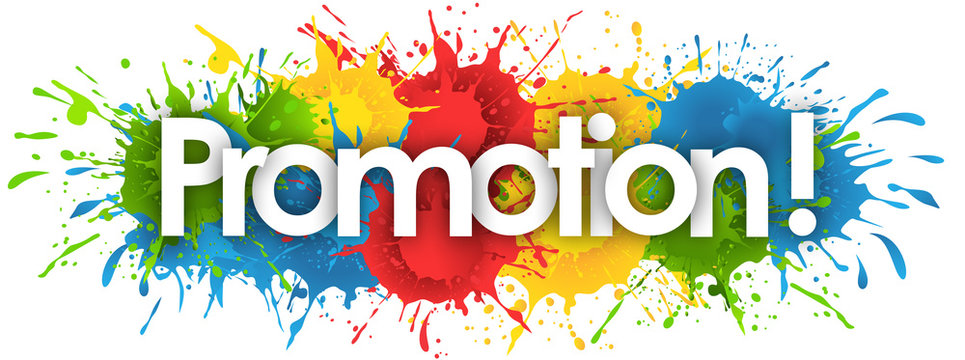

*Renaissance Hotel*

In [139]:
# promotion for December 
promotion3_h1 = spark_data.withColumn("discounted_rate", when((spark_data.arrival_date_month == 12) , spark_data.Average_Daily_Rate * 0.8)
.otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'Renaissance Hotel') & (spark_data.arrival_date_month == 12))
promotion3_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------------------+---------------------------+-------------------------+---------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requests

In [140]:
# promotion for January 
promotion3_h1 = spark_data.withColumn("discounted_rate", when((spark_data.arrival_date_month == 1) , spark_data.Average_Daily_Rate * 0.8)
.otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'Renaissance Hotel') & (spark_data.arrival_date_month == 1))
promotion3_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_r

*JW Marriott Hotel*

In [143]:
# promotion for December  
promotion3_h1 = spark_data.withColumn("discounted_rate", when((spark_data.arrival_date_month == 12) , spark_data.Average_Daily_Rate * 0.8)
.otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'JW Marriott Hotel') & (spark_data.arrival_date_month == 12))
promotion3_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------------------+---------------------------+-------------------------+---------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requests

In [142]:
# promotion for January   
promotion3_h1 = spark_data.withColumn("discounted_rate", when((spark_data.arrival_date_month == 1) , spark_data.Average_Daily_Rate * 0.8)
.otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'JW Marriott Hotel') & (spark_data.arrival_date_month == 1))
promotion3_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------------------+---------------------------+-------------------------+-----------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_reques

**4TH PROMOTION 🎫**

***Bed & Breakfast Package*** 🍽 

-----

**Promotion:**  Book a Bed & Breakfast package and receive a 15% discount on your stay ✨ .

**Condition:** Book a Bed & Breakfast stay at the hotel .

**Benefits:** To take a 25% discount on your stay .

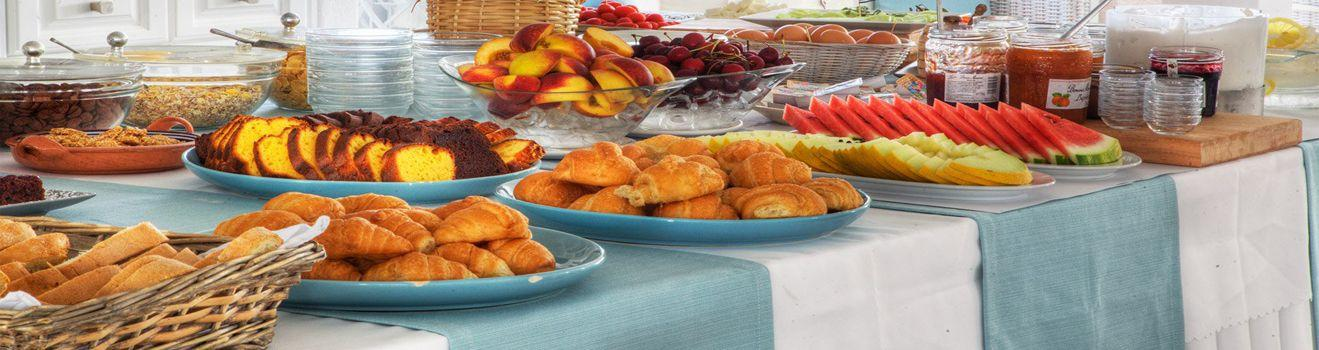

*Renaissance Hotel*

In [138]:
# apply full board package discount
promotion4_h1 = spark_data.withColumn("discounted_rate", when(spark_data.meal == "BB", spark_data.Average_Daily_Rate * 0.85)
.otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'Renaissance Hotel')& (spark_data.meal == "BB"))

promotion4_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_r

*JW Marriott Hotel*

In [137]:
# apply full board package discount
promotion4_h2 = spark_data.withColumn("discounted_rate", when(spark_data.meal == "BB", spark_data.Average_Daily_Rate * 0.85)
.otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'JW Marriott Hotel')& (spark_data.meal == "BB"))

promotion4_h2.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_r

**5TH PROMOTION** 🎫

***Honeymoon Bliss Package*** 💍

-----

**Promotion:** Book a minimum of 5 nights with your loved one and receive 25% off .

**Condition:** Offer available for 5 nights or more for 2 adults.

**Benefits:** Enjot your stay with your loved one and get 25% off .

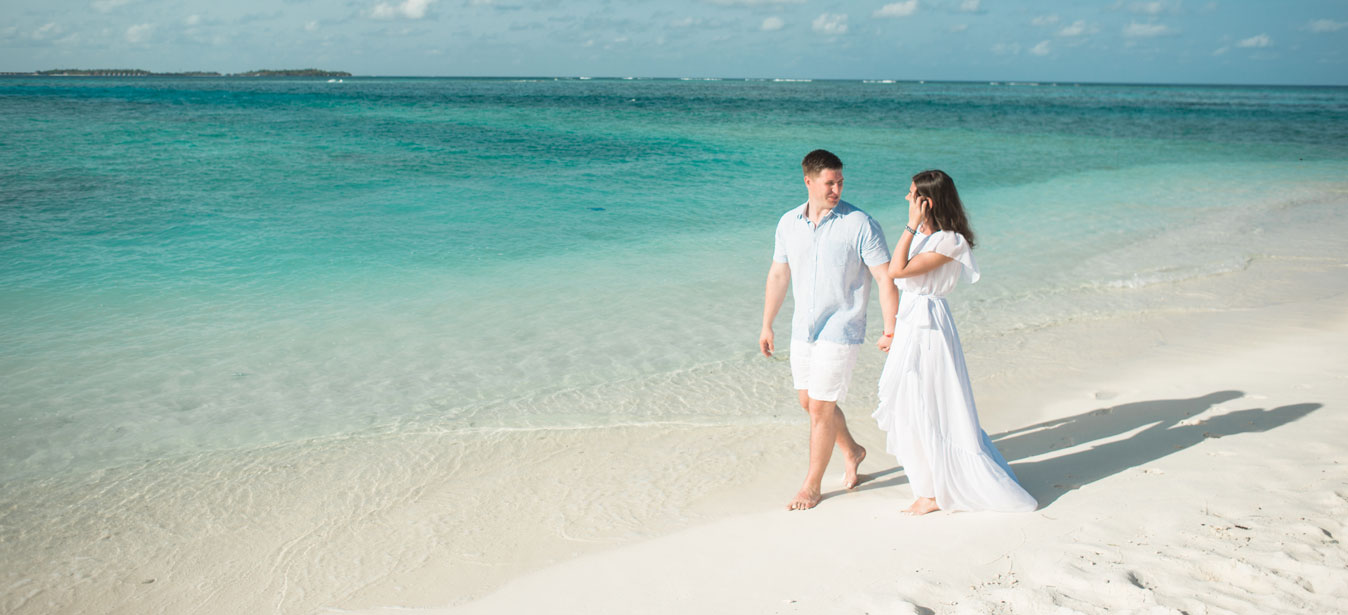

*Renaissance Hotel*

In [105]:
promotion5_conditions = ( (spark_data.adults == 2))

promotion5_h1 = spark_data.withColumn('Promotion',when(promotion5_conditions, '25% Off Promotion').otherwise('No Promotion')
 ).withColumn("Discount", when(promotion5_conditions, spark_data.Average_Daily_Rate * 0.75).otherwise(0)).filter(spark_data.hotel == 'Renaissance Hotel')
promotion5_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+-----------------+------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|

*JW Marriott Hotel*

In [106]:
promotion5_conditions = ( (spark_data.adults == 2))


promotion5_h2 = spark_data.withColumn('Promotion',when(promotion5_conditions, '25% Off Promotion').otherwise('No Promotion')
 ).withColumn("Discount", when(promotion5_conditions, spark_data.Average_Daily_Rate * 0.75).otherwise(0)).filter(spark_data.hotel == 'JW Marriott Hotel')
promotion5_h2.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+-----------------+--------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_s

**6TH PROMOTION** 🎫

***Celebrate Eid with Exclusive Offers!*** 🎊

---
**Promotion:** Celebrate Eid in style at the Renaissance and JW Marriott Hotels! As part of our special Eid promotion, guests staying with us during the months of May, June, and July will enjoy exclusive benefits and discounted rates.

**Condition:** Book a stay at the Hotel during the months of May, June, or July and get 10% off ! 

**Benefits:** Access to hotel amenities and facilities, including swimming pools, fitness centers, and more .

*Renaissance Hotel*

In [129]:
# apply the Eid promotion for May
promotion_conditions = (spark_data.arrival_date_month == 5 ) 
promotion6_h1 = spark_data.withColumn('Discounted_Rate', when(promotion_conditions, spark_data.Average_Daily_Rate * 0.9).otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'Renaissance Hotel') & (spark_data.arrival_date_month == 5 ) )

promotion6_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+---------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requ

In [130]:
# apply the Eid promotion for June
promotion_conditions = (spark_data.arrival_date_month == 6 ) 
promotion6_h1 = spark_data.withColumn('Discounted_Rate', when(promotion_conditions, spark_data.Average_Daily_Rate * 0.9).otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'Renaissance Hotel') & (spark_data.arrival_date_month == 6 ) )

promotion6_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------------------+---------------------------+-------------------------+---------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requests

In [131]:
# apply the Eid promotion for July
promotion_conditions = (spark_data.arrival_date_month == 7 )  
promotion6_h1 = spark_data.withColumn('Discounted_Rate', when(promotion_conditions, spark_data.Average_Daily_Rate * 0.9).otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'Renaissance Hotel') & (spark_data.arrival_date_month == 7 ) )

promotion6_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+---------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requ

*JW Marriott Hotel*

In [132]:
# apply the Eid promotion for May
promotion_conditions = (spark_data.arrival_date_month == 5 )  
promotion6_h1 = spark_data.withColumn('Discounted_Rate', when(promotion_conditions, spark_data.Average_Daily_Rate * 0.9).otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'JW Marriott Hotel') & (spark_data.arrival_date_month == 5 ) )

promotion6_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+---------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requ

In [133]:
# apply the Eid promotion for June
promotion_conditions = (spark_data.arrival_date_month == 6 )  
promotion6_h1 = spark_data.withColumn('Discounted_Rate', when(promotion_conditions, spark_data.Average_Daily_Rate * 0.9).otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'JW Marriott Hotel') & (spark_data.arrival_date_month == 6 ) )

promotion6_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------------------+---------------------------+-------------------------+---------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requests

In [134]:
# apply the Eid promotion for July
promotion_conditions = (spark_data.arrival_date_month == 7 )  
promotion6_h1 = spark_data.withColumn('Discounted_Rate', when(promotion_conditions, spark_data.Average_Daily_Rate * 0.9).otherwise(spark_data.Average_Daily_Rate)).filter((spark_data.hotel == 'JW Marriott Hotel') & (spark_data.arrival_date_month == 7 ) )

promotion6_h1.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------------------+---------------------------+-------------------------+------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_reque

# **4- Using SparkML, produce at least 3 models to predict whether a booking will be canceled or not**

**First, we'll create a new dataframe that holds the original dataset (cleaned_data)** 

 

In [109]:
spark_df = spark.createDataFrame(cleaned_data)

In [110]:
spark_df.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requests|
+---------

**now, we need to do some necessary featurization in order to apply Spark ML models** 

As the question wants to predict whether a booking will be canceled or not, we can conclude that the label column is going to be ( is_canceled). To do so, we need to convert all columns (including label column) to numeric type and create features column using Vector assembler . 

In [111]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

stages = []
categorical_cols = ['hotel', "meal", "country", "distribution_channel", "is_repeated_guest", "reserved_room_type",
                    "assigned_room_type", "deposit_type", "customer_type"]

for col in categorical_cols:
    indexer = StringIndexer(inputCol=col, outputCol=col+"_index")

    stages+=[indexer]

label_stringIdx = StringIndexer(inputCol = 'is_canceled', outputCol = 'label')
stages += [label_stringIdx]

numericCols = ['lead_time', 'arrival_date_year' , 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'Average_Daily_Rate', 'required_car_parking_spaces', 'total_of_special_requests']
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
stages += [assembler]

**In above cell of code, we converted all categorical columns into numeric in order to apply ML models using String indexer. Also, we created the vector assembler that holds all the features ( except the label column = is_canceled) .**  

In [112]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(spark_df)
df = pipelineModel.transform(spark_df)

df.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------------------+---------------------------+-------------------------+-----------+----------+-------------+--------------------------+-----------------------+------------------------+------------------------+------------------+-------------------+-----+--------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_cancele

**The above result shows all the columns that were converted including the original ones. We will drop the original categorical columns to have a cleaned elegant dataset ✨**

In [113]:
df = df.drop("hotel", 'is_canceled', 'meal' , 'country', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'  )
df.show() 

+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----------------------+------------------------------+---------------+-----+-------+--------------------+------------------+---------------------------+-------------------------+-----------+----------+-------------+--------------------------+-----------------------+------------------------+------------------------+------------------+-------------------+-----+--------------------+
|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|previous_cancellations|previous_bookings_not_canceled|booking_changes|agent|company|days_in_waiting_list|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requests|hotel_index|meal_index|country_index|distribution_channel_index|is_repeated_guest_index|reserved_room_typ

**Now, we'll start building the models. To do that, we'll split our dataset into train, & test**

In [114]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 137
Test Dataset Count: 51


**LogisticRegression Model**

In [115]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)
predictions = lrModel.transform(test)
predictions

DataFrame[lead_time: bigint, arrival_date_year: bigint, arrival_date_month: bigint, arrival_date_week_number: bigint, arrival_date_day_of_month: bigint, stays_in_weekend_nights: bigint, stays_in_week_nights: bigint, adults: bigint, children: double, babies: bigint, previous_cancellations: bigint, previous_bookings_not_canceled: bigint, booking_changes: bigint, agent: double, company: double, days_in_waiting_list: bigint, Average_Daily_Rate: double, required_car_parking_spaces: bigint, total_of_special_requests: bigint, hotel_index: double, meal_index: double, country_index: double, distribution_channel_index: double, is_repeated_guest_index: double, reserved_room_type_index: double, assigned_room_type_index: double, deposit_type_index: double, customer_type_index: double, label: double, features: vector, rawPrediction: vector, probability: vector, prediction: double]

In [116]:
predictions.show()

+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----------------------+------------------------------+---------------+-----+-------+--------------------+------------------+---------------------------+-------------------------+-----------+----------+-------------+--------------------------+-----------------------+------------------------+------------------------+------------------+-------------------+-----+--------------------+--------------------+--------------------+----------+
|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|previous_cancellations|previous_bookings_not_canceled|booking_changes|agent|company|days_in_waiting_list|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requests|hotel_index|meal_index|country_index|distribution_ch

In [117]:
from sklearn.metrics import accuracy_score

score =accuracy_score(predictions.select('label').toPandas(),predictions.select('prediction').toPandas())
score*100

80.3921568627451

**DecisionTreeClassifier Model**

In [118]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions2 = dtModel.transform(test)
predictions2.show()

+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----------------------+------------------------------+---------------+-----+-------+--------------------+------------------+---------------------------+-------------------------+-----------+----------+-------------+--------------------------+-----------------------+------------------------+------------------------+------------------+-------------------+-----+--------------------+-------------+--------------------+----------+
|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|previous_cancellations|previous_bookings_not_canceled|booking_changes|agent|company|days_in_waiting_list|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requests|hotel_index|meal_index|country_index|distribution_channel_i

In [119]:
from sklearn.metrics import accuracy_score
score = accuracy_score(predictions2.select('label').toPandas(), predictions2.select('prediction').toPandas())
score*100

82.35294117647058

**Random Forest Classifier Model**

In [120]:
from pyspark.ml.classification import RandomForestClassifier
dt = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
dtModel = dt.fit(train)
predictions3 = dtModel.transform(test)
predictions3.show()

+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----------------------+------------------------------+---------------+-----+-------+--------------------+------------------+---------------------------+-------------------------+-----------+----------+-------------+--------------------------+-----------------------+------------------------+------------------------+------------------+-------------------+-----+--------------------+--------------------+--------------------+----------+
|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|previous_cancellations|previous_bookings_not_canceled|booking_changes|agent|company|days_in_waiting_list|Average_Daily_Rate|required_car_parking_spaces|total_of_special_requests|hotel_index|meal_index|country_index|distribution_ch

In [121]:
from sklearn.metrics import accuracy_score
score = accuracy_score(predictions3.select('label').toPandas(), predictions3.select('prediction').toPandas())
score*100

86.27450980392157

we can conclude that the Random Forest Classifier model displayed the highest accuracy score .